In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import accuracy_score

path = '/content/drive/MyDrive/Data/diabetes_prediction_dataset.csv'
dataframe = pd.read_csv(path)

dataframe['gender'] = dataframe['gender'].replace({'Male': 1, 'Female': 0})
dataframe['smoking_history'] = dataframe['smoking_history'].replace({'No Info' : 0 , 'never' : 1 , 'former' : 2 , 'current' : 3 , 'not current' : 4 , 'ever' : 5})



Importing Libraries to set up the notebook, and getting the dataset ready to be used by the AI model. Replaced categorical values in the 'gender' and 'smoking_history' columns with numerical equivalents, and prepares the data for analysis.

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
train_df, test_df = train_test_split(dataframe, test_size=0.1, random_state=42)

# Splitting the test set further into validation and test sets
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Verify the shape of each split
print("Train set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (90000, 9)
Validation set shape: (5000, 9)
Test set shape: (5000, 9)



The code uses scikit-learn's train_test_split function to divide the dataframe into training, validation, and test sets This is done to prevent the model to memorize the data.

In [ ]:
#Just run once
#Saving Train/val/test data into google drive.
train_df.to_csv('/content/drive/MyDrive/Data/train_data.csv', index=False)
val_df.to_csv('/content/drive/MyDrive/Data/val_data.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/Data/test_data.csv', index=False)

Saving the different datasets into google drive.

In [ ]:
X = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
y = ['diabetes']

X_train = train_df[X]
print('X_train, our input variables:')
print(X_train.head())
print()

y_train = train_df[y]
print('y_train, our output variable:')
print(y_train.head())




X_train, our input variables:
        age  hypertension  heart_disease    bmi  HbA1c_level  \
51994  36.0             0              0  17.06          4.0   
77540  58.0             0              0  37.83          6.1   
16382  43.0             0              0  39.20          5.0   
83439  67.0             1              0  28.39          5.7   
61618   5.0             0              0  27.32          6.0   

       blood_glucose_level  
51994                  145  
77540                  159  
16382                  160  
83439                  159  
61618                   80  

y_train, our output variable:
       diabetes
51994         0
77540         0
16382         0
83439         0
61618         0


Setting up the model by mentioning which columns represent the input features and which column is the output label.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

Importing and defining the LogisticRegression model.

In [ ]:
from imblearn.over_sampling import ADASYN

Importing ADASYN

In [ ]:
#ADASYN for data augmentation
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

Resampling the existing dataset to make sure that the data is evenly balanced.

In [ ]:
model.fit(X_adasyn, y_adasyn)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Passing the data into the model.

In [ ]:
X_val = val_df[X]
y_val = val_df[y]

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8418


The overall accuracy of the Logistic Regression model is approximately around 84%.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_val, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])

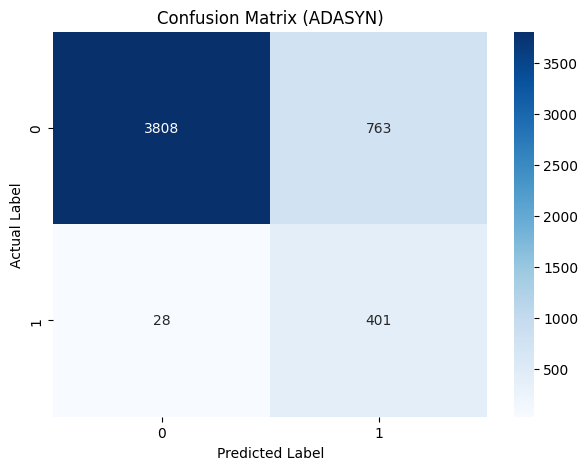

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (ADASYN)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

The accuracy for predicting the diabetes label is currently 93.5% with the implementation of ASASYN.

(401/429) * 100 = 93.5%